Установка библиотеки

In [ ]:
pip install seaborn

Этот код импортирует необходимые библиотеки Python и подготавливает набор данных “Ирис” для визуализации.

In [ ]:
import seaborn as sns
import pandas as pd #работы с данными в формате таблиц (DataFrame)
from sklearn.datasets import load_iris #загружает классический набор данных о цветах ирисов Фишера
import matplotlib.pyplot as plt
import plotly.express as px #для создания интерактивных веб-графиков

iris = load_iris()#загруженный набор данных в переменную iris.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #Создает объект DataFrame из данных, содержащихся в iris.data. iris.feature_names
df['species'] = iris.target_names[iris.target]#Добавляет новый столбец species в DataFrame df, содержащий названия видов ирисов (setosa, versicolor, virginica) на основе данных из iris.target
df['index'] = df.index #Добавляет новый столбец index, содержащий индексы строк DataFrame (от 0 до 149)

# Она группирует данные в df по двум столбцам: species (вид ириса) и index (номер наблюдения).
#Затем, для каждой группы, вычисляется среднее значение длины чашелистика ('sepal length (cm)') с помощью функции agg... сбрасывает индексы, создавая стандартный DataFrame с индексами от 0 до N.
grouped = df.groupby(['species', 'index']).agg({'sepal length (cm)': 'mean'}).reset_index()

1. Гистограмма:
Графическое представление распределения частоты непрерывной переменной.

Более высокоуровневый подход. histplot автоматически подбирает оптимальное количество интервалов и опционально добавляет кривую плотности (kde=True), что делает график более информативным.

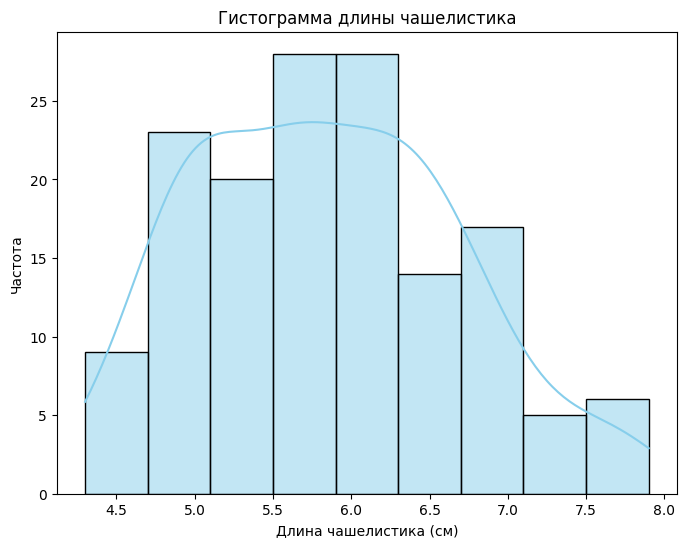

In [ ]:
# Создаем графическое окно размером 8x6 дюймов
plt.figure(figsize=(8, 6))

# Строим гистограмму с кривой плотности ядра
# df['sepal length (cm)']:  Данные для гистограммы (длина чашелистика)
# kde=True: Включает отображение кривой плотности ядра (Kernel Density Estimation), которая сглаживает гистограмму и показывает плавную оценку распределения
# color='skyblue':  Задает цвет гистограммы
sns.histplot(df['sepal length (cm)'], kde=True, color='skyblue')

# Добавляем подписи к осям
plt.xlabel('Длина чашелистика (см)')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y

# Добавляем заголовок
plt.title('Гистограмма длины чашелистика')

# Отображаем график
plt.show()
#kde=True: Этот параметр включает отображение кривой плотности ядра поверх гистограммы.

В данном случае **Seaborn** обеспечивает наиболее удобный и информативный способ создания гистограммы с минимальным кодом благодаря автоматической оптимизации и возможности отображения кривой плотности.

2. Диаграмма рассеяния (Scatter plot): График, показывающий взаимосвязь между двумя переменными.

Более простой и элегантный синтаксис. Автоматически обрабатывает категориальные переменные (hue='species'), создавая легенду и отображая точки разных цветов.

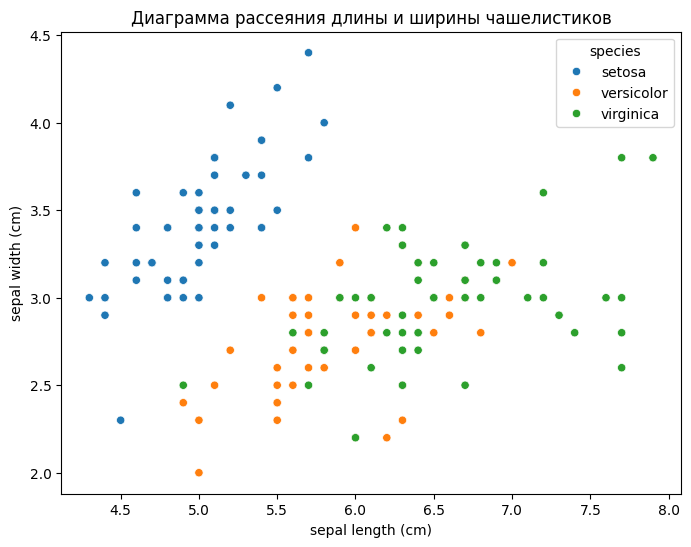

In [ ]:
# Создаем графическое окно размером 8x6 дюймов
plt.figure(figsize=(8, 6))

# Строим диаграмму рассеяния с помощью Seaborn
# x='sepal length (cm)': Данные для оси X (длина чашелистика)
# y='sepal width (cm)': Данные для оси Y (ширина чашелистика)
# hue='species':  Разные цвета точек в зависимости от вида цветка (столбец 'species')
# data=df:  Источник данных (DataFrame df)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)

# Добавляем заголовок к графику
plt.title('Диаграмма рассеяния длины и ширины чашелистиков')

# Отображаем график
plt.show()

В данном примере **Seaborn** предлагает наиболее лаконичный и удобный способ создания диаграммы рассеяния с разделением по категориям.

3. Ящик с усами (Box plot): Графическое представление распределения данных, показывающее медиану, квартили и выбросы.

Простой и элегантный код. Автоматически создает привлекательный график с минимальными усилиями.

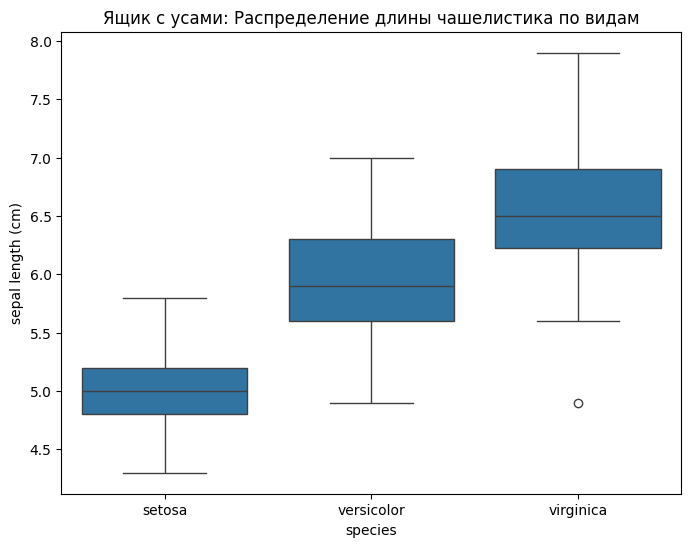

In [ ]:
# Установка размера рисунка
plt.figure(figsize=(8, 6))

# Создание графика "ящик с усами" с помощью Seaborn
# x='species':  Категориальная переменная (вид цветка) для группировки данных на графике.  Данные будут разделены по видам.
# y='sepal length (cm)':  Численная переменная (длина чашелистика), для которой будет построено распределение.
# data=df:  DataFrame, содержащий данные.
sns.boxplot(x='species', y='sepal length (cm)', data=df)

# Добавление заголовка графика
plt.title('Ящик с усами: Распределение длины чашелистика по видам')

# Отображение графика
plt.show()

В этом случае Seaborn предоставляет наиболее простой и лаконичный способ создания ящика с усами, в то время как Matplotlib требует немного больше кода, но позволяет достичь более тонкой настройки.

4. Линейный график: График, отображающий изменения переменной во времени или в зависимости от другой переменной.


В этом варианте мы используем Seaborn для стилизации графика, но сохраняем индивидуальные точки для каждого наблюдения.

Seaborn не имеет встроенной функции для построения линейных графиков в такой форме. Для создания подобного графика, придется использовать Matplotlib вместе с Seaborn для стилизации:

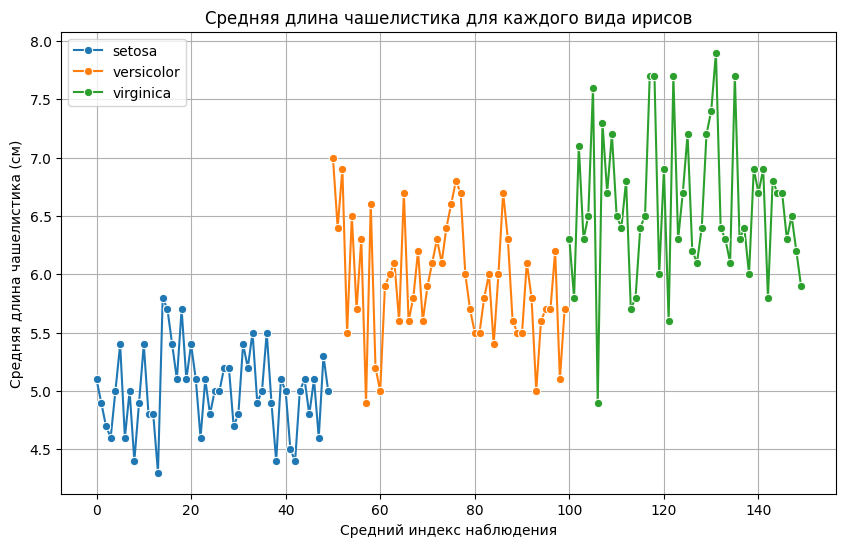

In [ ]:
# Установка размера рисунка
plt.figure(figsize=(10, 6))

# Построение линейного графика с помощью Seaborn
# x='index':  Значение индекса DataFrame используется в качестве значений на оси X.  Предполагается, что индекс числовой и упорядоченный.
# y='sepal length (cm)':  Данные для оси Y (средняя длина чашелистика).
# hue='species':  Разделение данных на линии по видам ирисов.
# data=df:  DataFrame, содержащий данные.
# marker='o':  Добавление маркеров на линии графика.
# errorbar=None:  Отключение отображения ошибок.
# estimator='mean':  Использование среднего значения для агрегации данных в каждой точке графика.
sns.lineplot(x='index', y='sepal length (cm)', hue='species', data=df, marker='o', errorbar=None, estimator='mean')

# Добавление подписей к осям
plt.xlabel('Средний индекс наблюдения')
plt.ylabel('Средняя длина чашелистика (см)')

# Добавление заголовка графика
plt.title('Средняя длина чашелистика для каждого вида ирисов')

# Добавление легенды
plt.legend()

# Добавление сетки на график
plt.grid(True)

# Отображение графика
plt.show()

Обратите внимание, что Seaborn здесь сглаживает данные с помощью метода estimator= 'mean' и строит одну линию для каждого вида, а не точечный график как Matplotlib. Для полного соответствия Matplotlib, пришлось бы ручным способом формировать данные для каждой точки.

Seaborn занимает промежуточное положение, обеспечивая баланс между простотой использования и визуальной привлекательностью, но с меньшей гибкостью в создании специфических линейных графиков, в сравнении с Matplotlib.

**Вывод:**

**Seaborn**, как высокоуровневая библиотека, построенная на базе Matplotlib, упрощает создание статистически-ориентированных графиков. Seaborn генерирует эстетически привлекательные и информативные визуализации с минимальным количеством кода, что делает его идеальным выбором для быстрого создания графиков и эксплораторного анализа данных. Однако, гибкость настройки в Seaborn несколько ограничена по сравнению с Matplotlib.